# Problem Statement

To predict future ODI cricket match winner based on previous year's match result.

# Introduction

- Cricket is one of the most popular sports in world, especially in India. The game is highly uncertain.
- It is the sport which generate high revenue.
- What if the winner team of the match can be predicted before the match, even have begin?
- Because we are predicting a output which is categorical value, that is the probelm is a classification problem.

## Dataset Desciption

The dataset folder contains the following file:

ODI-data-1971-2017.csv = 3932 rows x 7 columns

Columns Provided in the Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date

ODI-data-2017-2021.csv = 495 x 8 columns

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

# For this problem we will be using samples from 2010 to 2021.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the datasets ODI_data_1971_2017 and ODI_data_2017_2021
df=pd.read_csv("ODI-data-1971-2017-2.csv")
df1=pd.read_csv('ODI-Data-2017-2021.csv')


In [3]:
# ODI_data_1971_2017 data
df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [4]:
# ODI_data_2017_2021 data
df1

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"
...,...,...,...,...,...,...,...,...
490,490,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
491,491,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
492,492,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
493,493,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [5]:
# Droping rows with index range 0 to 116
df1=df1.drop(range(0,116))
# Reset index of the dataframe
df1.reset_index(inplace=True)
# Drop the extra 'index' column from dataframe
df1=df1.drop(columns=['index','Unnamed: 0'],axis=1)

In [6]:
# Load ODI_data_1971_2021 the dataset
new_df=pd.concat([df,df1],ignore_index=True)

In [7]:
new_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
4306,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
4307,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
4308,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
4309,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [8]:
# Drop values from 0 to 2936 as it all conten samples of before year 2010
# Store all remaining smaple in new dataframe
new_data=new_df.drop(range(0,2936),axis=0)

In [9]:
# Reset index of the new dataframe
new_data=new_data.reset_index()

In [10]:
# Remove extra 'index' Column from ew dataframe 
new_data=new_data.drop(columns=['index'],axis=1)

In [11]:
# ODI_data_2010_2021 data
new_data

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1370,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1371,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1372,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1373,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [12]:
# Check all column names
new_data.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [13]:
# Check info of complete dataset
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1375 non-null   object
 1   Team 1      1375 non-null   object
 2   Team 2      1375 non-null   object
 3   Winner      1375 non-null   object
 4   Margin      1326 non-null   object
 5   Ground      1375 non-null   object
 6   Match Date  1375 non-null   object
dtypes: object(7)
memory usage: 75.3+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [14]:
# For more information on the dataset like the total count in all the columns
new_data.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1375,1375,1375,1375,1326,1375,1375
unique,1375,23,23,25,213,124,1150
top,ODI # 2937,England,Pakistan,India,6 wickets,Dhaka,"Mar 6, 2018"
freq,1,141,175,164,126,87,4


## Get the total number of samples in the dataset using the len() function

In [15]:
# print len of the datset 
print("ODI dataset length",len(new_data))

ODI dataset length 1375


## Get unique values

In [16]:
# loop through datatset to find count of unique values of each column
for x in new_data.columns:
    print(x,':',len(new_data[x].unique()))

Scorecard : 1375
Team 1 : 23
Team 2 : 23
Winner : 25
Margin : 214
Ground : 124
Match Date : 1150


## Counting the total number of missing values

In [17]:
# Check for missing values in all the columnns of the dataset
new_data.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

By the observation gather from the ODI_data_2010_2021.info() , we can know there are missing values in the "Margin" column of dataset

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [18]:
# Import necessary libraries needed for performing Chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Helper function for performing chi-square test
def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table= pd.crosstab(new_data[var_1],new_data[var_2])
    
    #Observed Values
    observed_values= contingency_table.values
    
    #Expected Values
    b=chi2_contingency(contingency_table)
    expected_values=b[3]
    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:,0])
    no_of_columns=len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of freedom: ",degree_f)
    #Significance Level 5%
    alpha=0.05
    print("Significance level: ",alpha)
    
    #chi-square statistic
    chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistics=chi_square[0]+chi_square[1]
    print("chi-square statistics: ",chi_square_statistics)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print("critical value: ",critical_value)
    
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistics,df=degree_f)
    print("p-value:",p_value)
   
    # check condition based on chi_square_statistic and critical value for hypothesis rejection     
    if chi_square_statistics >= critical_value:
        print("Reject H0,there is a relationship between 2 categorical variables")
    else:
        print("Retain H0,there is no relationship between 2 categorical variables")
    
    # check condition based on p value and alpha for hypothesis rejection  
    if p_value<=alpha:
        print("Reject H0,there is a relationship between 2 categorical variables")
    else:
        print("Retain H0,there is no relationship between 2 categorical variables")

In [19]:
# looping on whole dataset for performing chi-square test
for x in new_data.columns:
    # Inner loop on whol edataset columns name
    for i in new_data.columns:
        # checking condition that both column names are should not be equal
        if i != x:
            print("chi-square test on: ",x,'',i,'\n' )
            # passing both column names to chi-sqaure performance function
            perform_chi_square_test(x,i)
            print('---------------------------------------------------\n')

chi-square test on:  Scorecard  Team 1 

Degree of freedom:  30228
Significance level:  0.05
chi-square statistics:  2549.9999999999623
critical value:  30633.567183419527
p-value: 1.0
Retain H0,there is no relationship between 2 categorical variables
Retain H0,there is no relationship between 2 categorical variables
---------------------------------------------------

chi-square test on:  Scorecard  Team 2 

Degree of freedom:  30228
Significance level:  0.05
chi-square statistics:  2592.0000000000355
critical value:  30633.567183419527
p-value: 1.0
Retain H0,there is no relationship between 2 categorical variables
Retain H0,there is no relationship between 2 categorical variables
---------------------------------------------------

chi-square test on:  Scorecard  Winner 

Degree of freedom:  32976
Significance level:  0.05
chi-square statistics:  2557.000000000013
critical value:  33399.55082702824
p-value: 1.0
Retain H0,there is no relationship between 2 categorical variables
Retain

Degree of freedom:  27576
Significance level:  0.05
chi-square statistics:  40.90254237288136
critical value:  27963.418723067858
p-value: 1.0
Retain H0,there is no relationship between 2 categorical variables
Retain H0,there is no relationship between 2 categorical variables
---------------------------------------------------

chi-square test on:  Margin  Scorecard 

Degree of freedom:  280900
Significance level:  0.05
chi-square statistics:  26.56325507180305
critical value:  282134.0083642959
p-value: 1.0
Retain H0,there is no relationship between 2 categorical variables
Retain H0,there is no relationship between 2 categorical variables
---------------------------------------------------

chi-square test on:  Margin  Team 1 

Degree of freedom:  4664
Significance level:  0.05
chi-square statistics:  342.8192553673018
critical value:  4823.991425012426
p-value: 1.0
Retain H0,there is no relationship between 2 categorical variables
Retain H0,there is no relationship between 2 categori

From above chi-square test:

There is correlation between Team 1 and Winner data.

## groupby

You can use groupby to chunk up your data into subsets for further analysis.

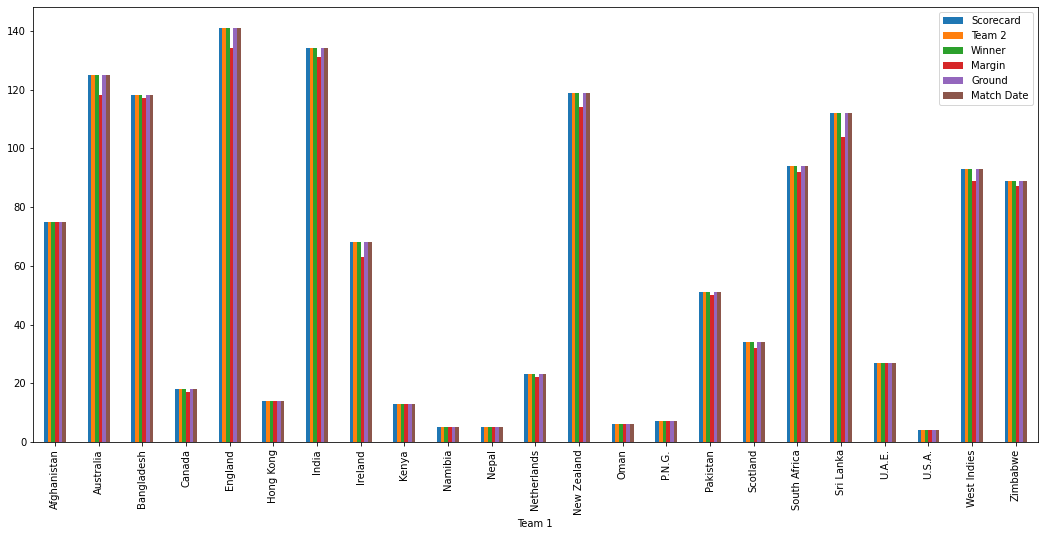

In [20]:
# group data by Team 1 and plot count plot
new_data.groupby('Team 1').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. There are more samples of team 1 as Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as compared to other teams
2. Samples of team 1 as  Namibia, Oman, Nepal, P.N.G, U.S.A are very less

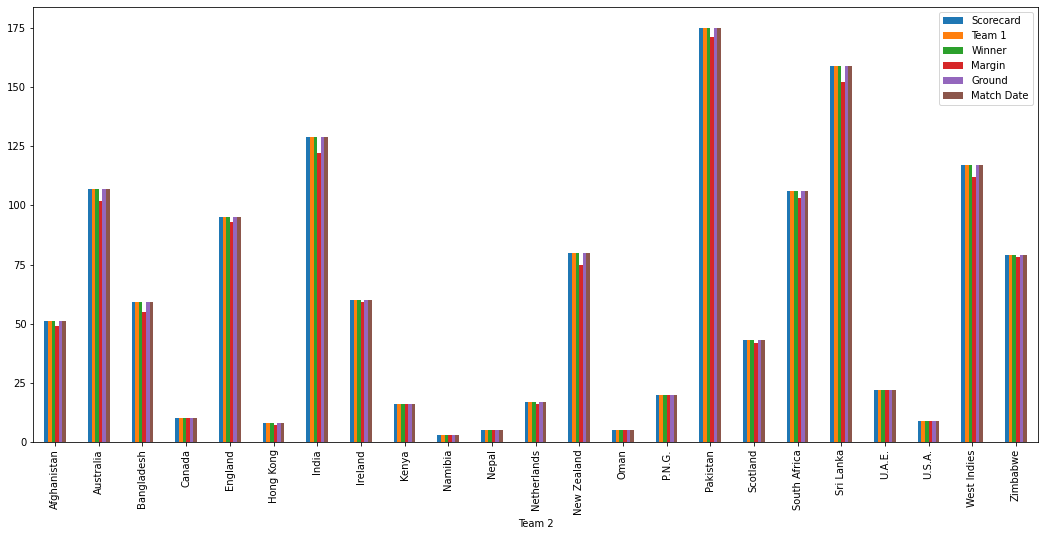

In [21]:
# group data by Team 2 and plot count plot
new_data.groupby('Team 2').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. There are more samples of team 2 as Afghanistan, Australia, Bangladesh, England, India, Pakistan, Ireland, New Zealand, West Indies, Sri Lanks, South Africa Zimbabwe as compared to other teams
2. Samples of team 2 as  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada are very less

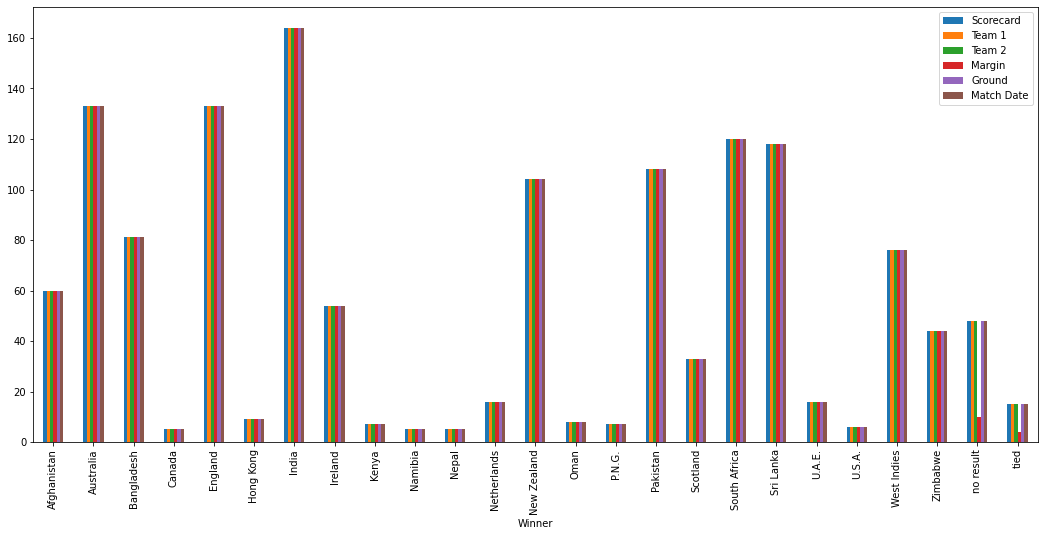

In [22]:
# group data by Winner and plot count plot
new_data.groupby('Winner').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. There are more samples of Winner as Australia, Bangladesh, England, India, Pakistan, New Zealand, West Indies, Zimbabwe, South Africa, Sri Lanka as compared to other teams
2. Samples of Winner as Canada, Hong Kong, Kenya, Namibia, Oman, Nepal, P.N.G, U.S.A are very less
3. Also there are many matches with no result nad few which were tied.

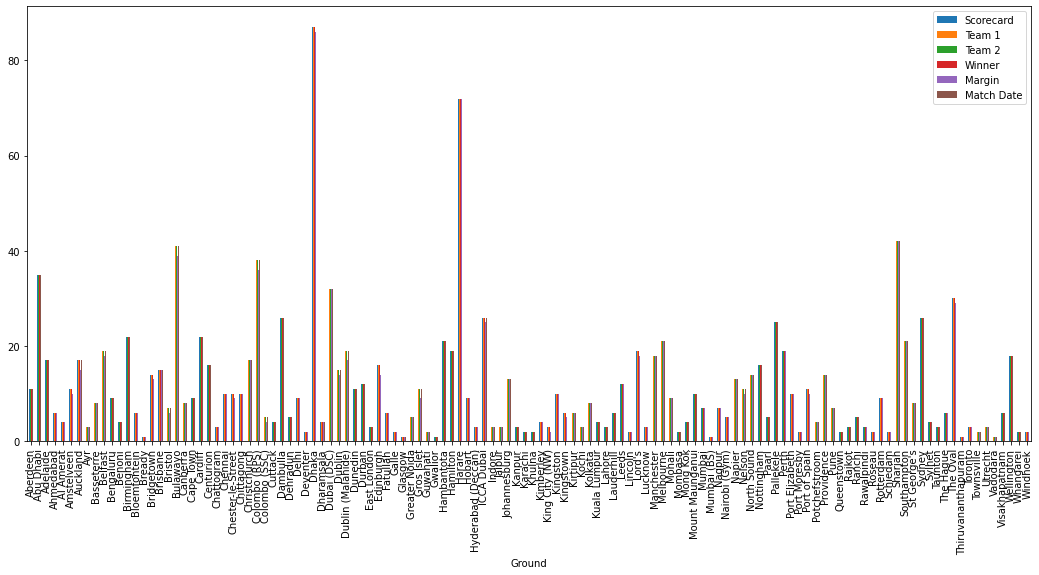

In [23]:
# group data by Ground and plot count plot
new_data.groupby('Ground').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. There are more samples of ground Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS), Sharjah

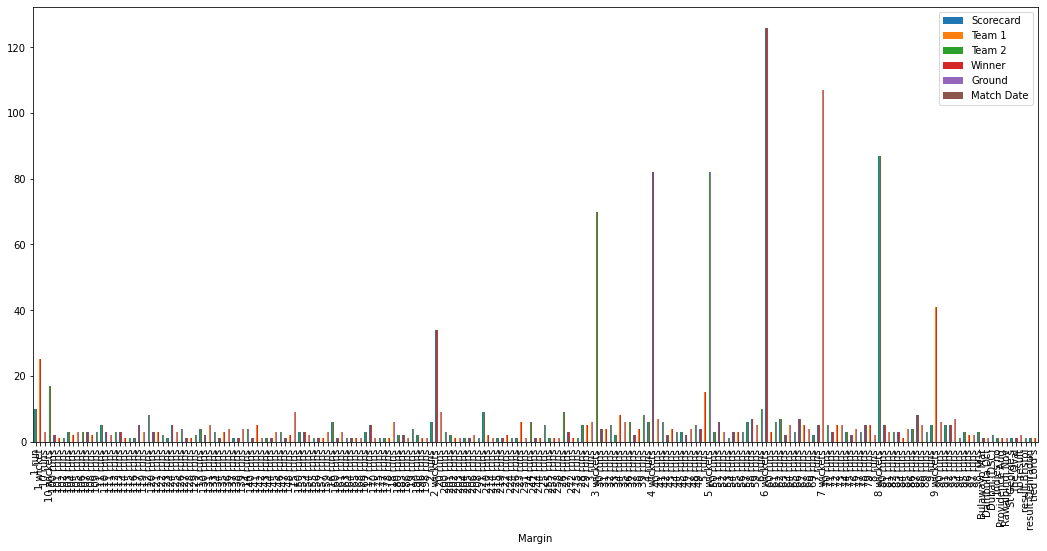

In [24]:
# group data by Margin and plot count plot
new_data.groupby('Margin').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. Few Matches margin are very high then other matches, we need two sclae these numbers.

## Catplot

Catplot shows frequencies of the of more than one categorical values at a time.

We will be doing categorical scatterplot using "swarm" kind 

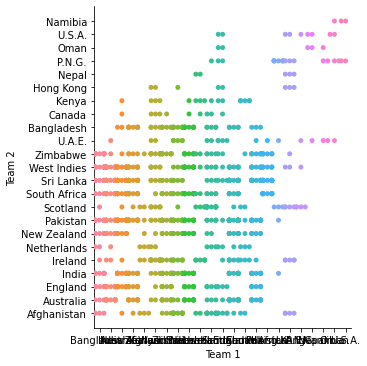

In [25]:
# cat plot between Team 1 and Team 2 column using kind="swarm"
sb.catplot(x="Team 1", y="Team 2", kind='swarm',data=new_data);

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

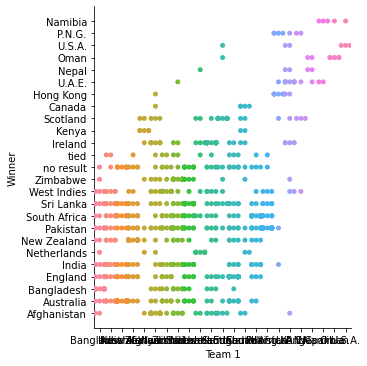

In [26]:
# cat plot between Team 1 and Winner column using kind="swarm"
sb.catplot(x="Team 1", y="Winner", kind='swarm',data=new_data);

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

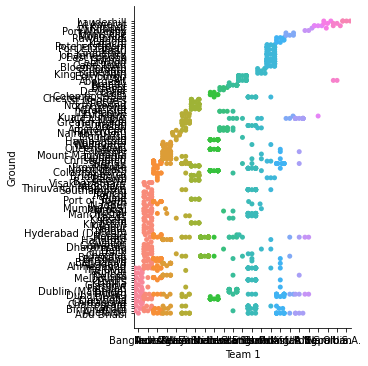

In [27]:
# cat plot between Team 1 and Ground column using kind="swarm"
sb.catplot(x="Team 1", y="Ground", kind='swarm',data=new_data);

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

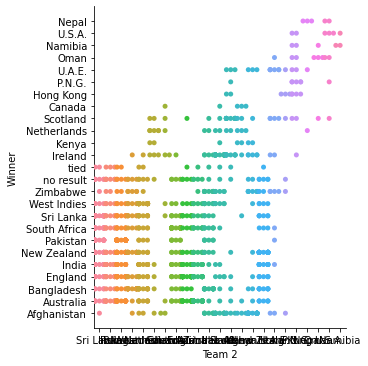

In [28]:
# cat plot between Team 2 and Winner column using kind="swarm"
sb.catplot(x="Team 2", y="Winner", kind='swarm',data=new_data);

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

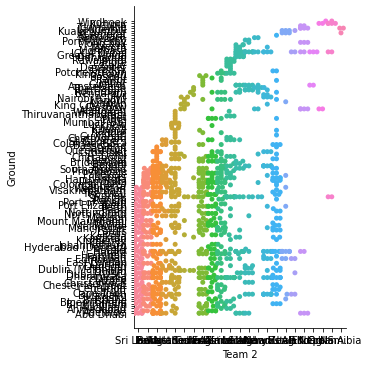

In [29]:
# cat plot between Team 2 and Ground column using kind="swarm"
sb.catplot(x="Team 2", y="Ground", kind='swarm',data=new_data);

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

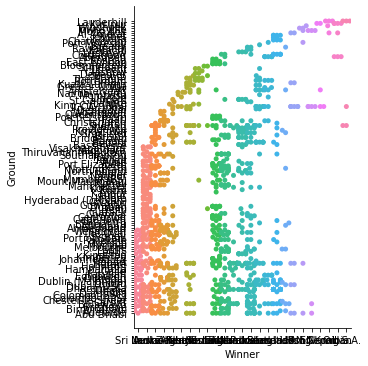

In [30]:
# cat plot between Winner and Ground column using kind="swarm"
sb.catplot(x="Winner", y="Ground", kind='swarm',data=new_data);

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


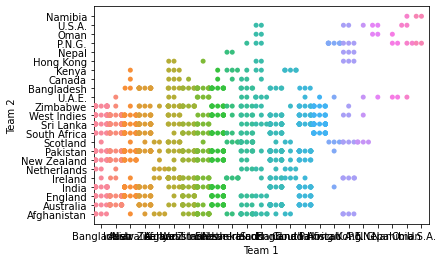

In [31]:
# swarm plot between Team 1 and Team 2 column
sb.swarmplot(x="Team 1", y="Team 2", data=new_data);

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with all teams.

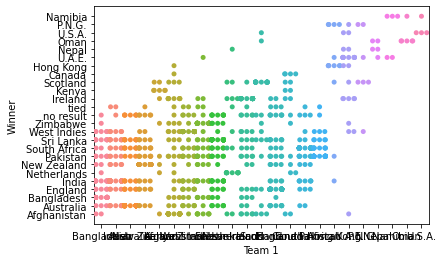

In [32]:
# swarm plot between Team 1 and Winner column
sb.swarmplot(x="Team 1", y="Winner", data=new_data);

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

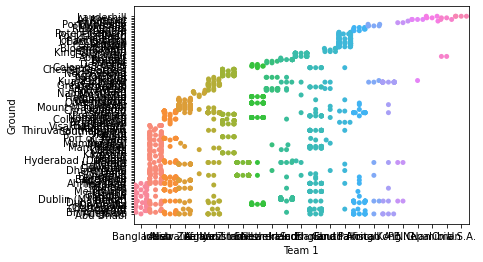

In [33]:
# swarm plot between Team 1 and Ground column
sb.swarmplot(x="Team 1", y="Ground", data=new_data);

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

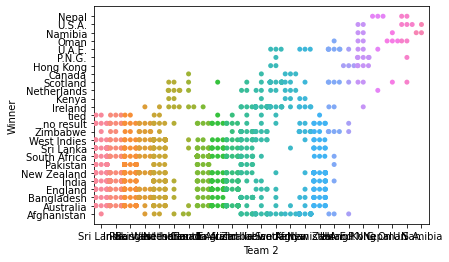

In [34]:
# swarm plot between Team 2 and Winner column
sb.swarmplot(x="Team 2", y="Winner", data=new_data);

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

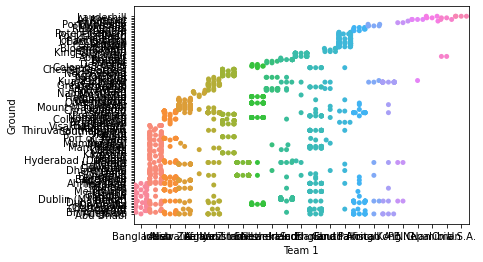

In [35]:
# swarm plot between Team 2 and Ground column
sb.swarmplot(x="Team 1", y="Ground", data=new_data);

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

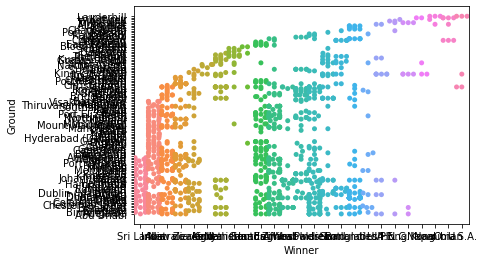

In [36]:
# swarm plot between Winner and Ground column
sb.swarmplot(x="Winner", y="Ground", data=new_data);

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

<AxesSubplot:xlabel='Team 1', ylabel='Team 2'>

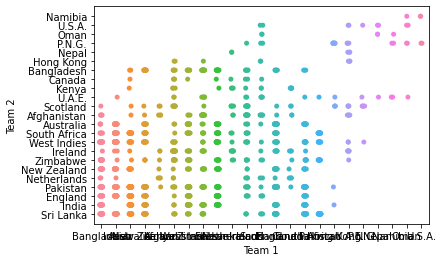

In [37]:
# strip plot between Team 1 and Team 2 column
sb.stripplot(x="Team 1", y="Team 2", data=new_data,jitter=True)

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

<AxesSubplot:xlabel='Team 1', ylabel='Winner'>

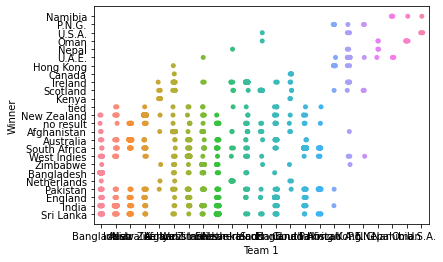

In [38]:
# strip plot between Team 1 and Winner column
sb.stripplot(x="Team 1", y="Winner", data=new_data,jitter=True)

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

<AxesSubplot:xlabel='Team 1', ylabel='Ground'>

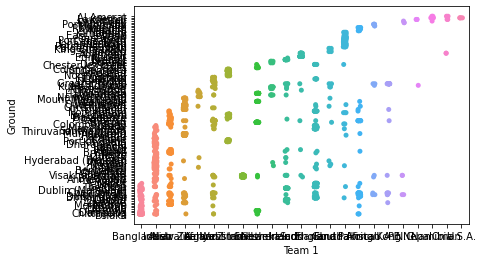

In [39]:
# strip plot between Team 1 and Ground column
sb.stripplot(x="Team 1", y="Ground", data=new_data,jitter=True)

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

<AxesSubplot:xlabel='Team 2', ylabel='Winner'>

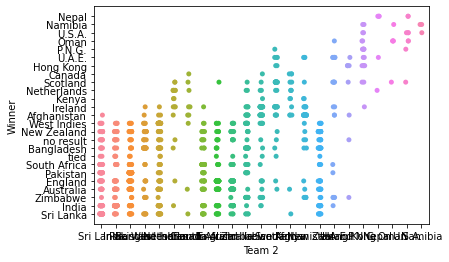

In [40]:
# strip plot between Team 2 and Winner column
sb.stripplot(x="Team 2", y="Winner" ,data=new_data,jitter=True)

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

<AxesSubplot:xlabel='Team 2', ylabel='Ground'>

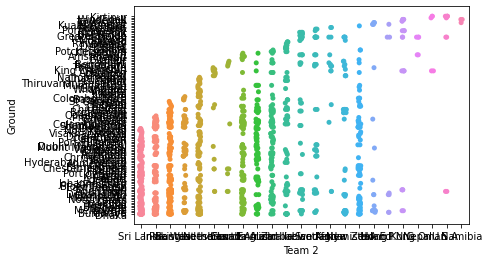

In [41]:
# strip plot between Team 2 and Ground column
sb.stripplot(x="Team 2", y="Ground", data=new_data,jitter=True)

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

<AxesSubplot:xlabel='Winner', ylabel='Ground'>

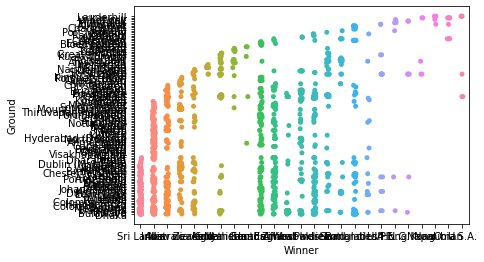

In [42]:
# strip plot between Winner and Ground column
sb.stripplot(x="Winner", y="Ground", data=new_data,jitter=True)

From the above graph:
1. Many Winner teams are having matches repeatedly at a particular range of ground.

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

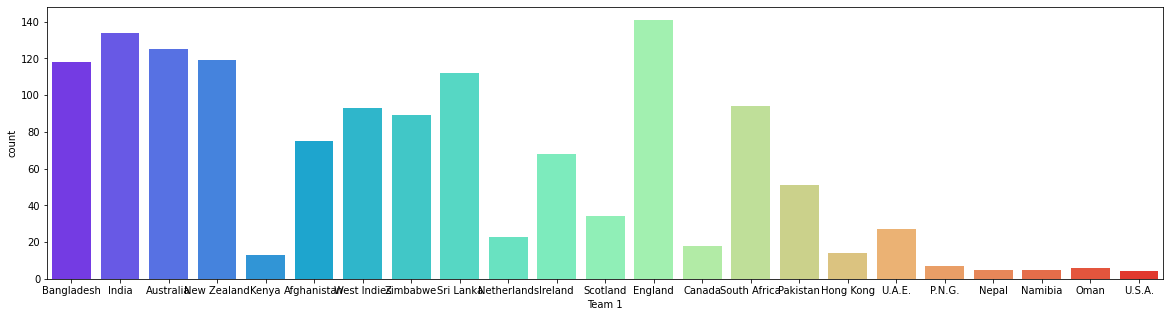

In [43]:
# count plot for Team 1 column
plt.figure(figsize=(20, 5))
sb.countplot(x="Team 1", data=new_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

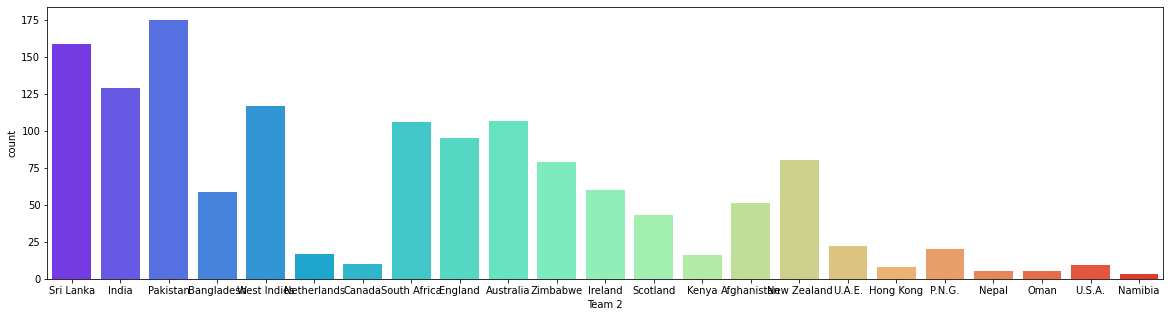

In [44]:
# count plot for Team 2 column
plt.figure(figsize=(20, 5))
sb.countplot(x="Team 2", data=new_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

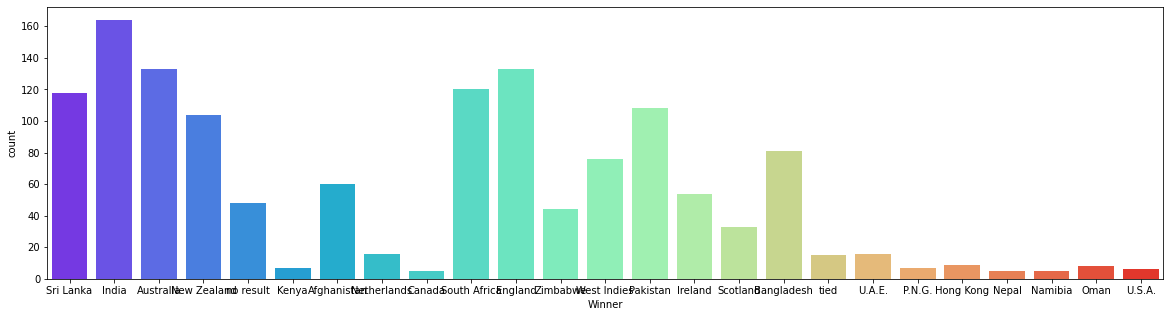

In [45]:
# count plot for Winner column
plt.figure(figsize=(20, 5))
sb.countplot(x="Winner", data=new_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of winner teams is not equal over complete dataset, skewed left, multimodel.

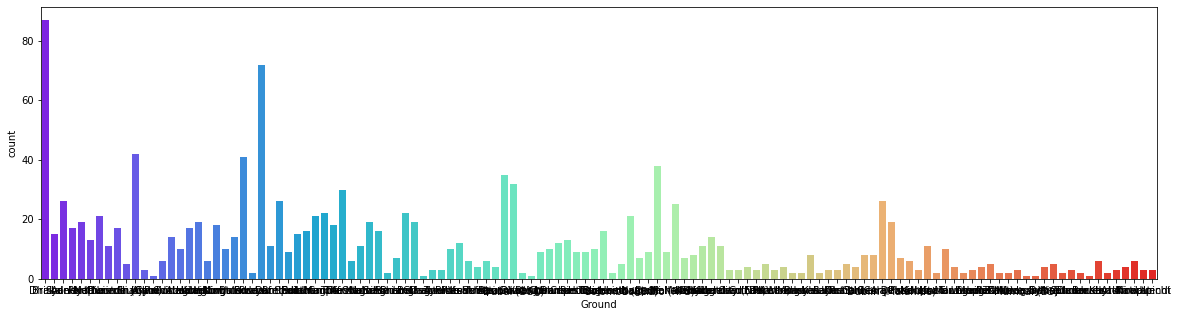

In [46]:
# count plot for Ground column
plt.figure(figsize=(20, 5))
sb.countplot(x="Ground", data=new_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

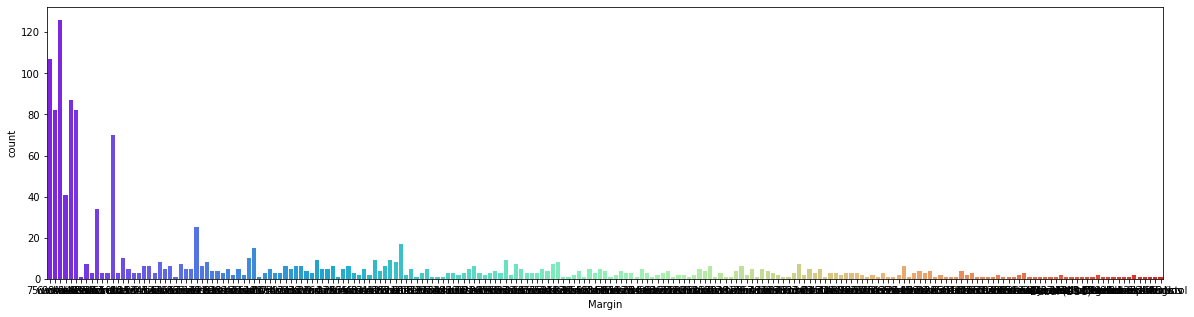

In [47]:
# count plot for Margin column
plt.figure(figsize=(20, 5))
sb.countplot(x="Margin", data=new_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of Margin is not equal over complete dataset, skewed left.

## Dendrogram

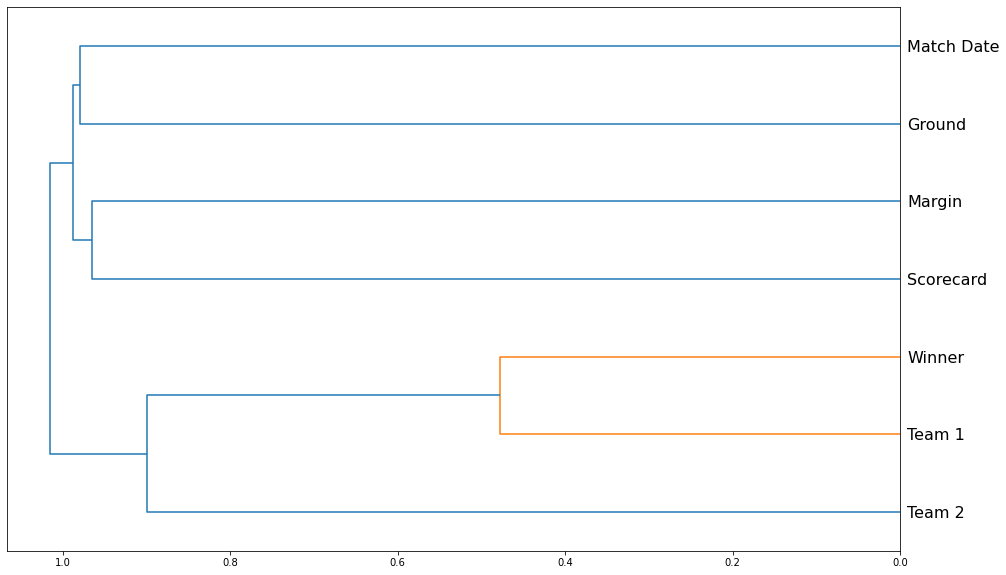

In [48]:
# Plot a Dendrogram on the columns of the dataset

# create a varibake to store ODI_data_2010_2021 after dropin nan values
X=new_data.dropna()

# import scipy
import scipy

# import hierarchy from skleanr.cluster
from scipy.cluster import hierarchy as hc

# create corr variable to store correlation results
corr=np.round(scipy.stats.spearmanr(X).correlation,4)
# condense the corr variable
corr_condensed= hc.distance.squareform(1-corr)

# pass the condensed corr variable to hierarchy linkage for getting average and sore it in new varibale
z=hc.linkage(corr_condensed,method='average')

# plot a dendogram with values of new varibale just created above.
fig=plt.figure(figsize=(16,10))
dendogram=hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()


observation from dendrogram

Strongly correlated variables:
    Team 1 and Winner

## Since, there are missing values in Margin column of dataset

We need to drop those empty columns. Beacase all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [49]:
# Droping rows with missing values
new_data=new_data.dropna()
# Reseting index of samples
new_data=new_data.reset_index()
# Droping extra "index" column from dataset
new_data.drop(columns=['index'],axis=1,inplace=True)

In [50]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'
new_data =new_data[(new_data['Winner'] != 'no result')
                     & (new_data['Winner'] != 'tied')]
# Rest index of the datframe
new_data=new_data.reset_index()
# Drop the extra 'index' column from dataframe
new_data.drop(columns=['index'],axis=1,inplace=True)

## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [51]:
# Create a list for storing runs
won_by_run=[]
# Create a list for storing wickets
won_by_wicket=[]
# looping through dataset column Margin
for margin in new_data['Margin']:
  # Splitting the string data by space and making a list
  lst=margin.split(" ")
  
  # Exceptin handling
  try:
    # Search for index of "run" in string, after success the index of "run" will be stored in index variable 
    index=lst.index("run")
    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    won_by_run.append(int(lst[index -1]))
    # Appending the the 0 from splitted data to won by wicket list created before looping 
    won_by_wicket.append(0)

    # After fail --> print("-")
  except:  
    print("-")  

  # Exceptin handling
  try:  
    # Search for index of "runs" in string, after success the index of "runs" will be stored in index variable 
        index=lst.index("runs")
    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
        won_by_run.append(int(lst[index -1]))
    # Appending the the 0 from splitted data to won by wicket list created before looping 
        won_by_wicket.append(0)

    # After fail --> print("-")
  except:  
        print("-")    

  # Exceptin handling
  try:  
    # Search for index of "wicket" in string, after success the index of "wicket" will be stored in index variable 
        index=lst.index("wicket")
    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
        won_by_wicket.append(int(lst[index -1]))
    # Appending the the 0 from splitted data to won by run list created before looping 
        won_by_run.append(0)
    # After fail --> print("-"):
  except:  
        print("-")   

  # Exceptin handling
  try:  
    # Search for index of "wickets" in string, after success the index of "wickets" will be stored in index variable 
        index=lst.index("wickets")
    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
        won_by_wicket.append(int(lst[index -1]))
    # Appending the the 0 from splitted data to won by run list created before looping 
        won_by_run.append(0)
    # After fail --> print("-")
  except:  
        print("-")    

# Add a new column named 'Won_By_Runs' to Datframe with the respectiev data list
new_data['Won_By_Runs']=won_by_run
# Add a new column named 'Won_By_Wickets' to Datframe with the respectiev data list
new_data['Won_By_Wickets']=won_by_wicket

new_data

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8
...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

Explanation:
If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [52]:

# Create list to store team 1 first batting
team_1_bat=[]
# Create list to store team 2 first batting
team_2_bat=[]
# looping through Team 1, Team 2, Won_by_wickets, Won_by_runs, Winner columns simultaneously using zip method in python
for team1,team2,wickets,runs,winner in zip(new_data['Team 1'],new_data['Team 2'],new_data['Won_By_Wickets'],new_data['Won_By_Runs'],new_data['Winner']):

  # Check condition if runs are greater than 0 and team 1 is the winner 
  if int(runs) > 0 and winner== team1:
    # Append 1 to team_1_first_batting list
    team_1_bat.append(1)
    # Append 0 to team_2_first_batting list
    team_2_bat.append(0)
  # Check condition if runs are greater than 0 and team 2 is the winner 
  elif int(runs)>0 and winner==team2:
    # Append 0 to team_1_first_batting list
    team_1_bat.append(0)
    # Append 1 to team_2_first_batting list
    team_2_bat.append(1)
  # Check condition if wickets are greater than 0 and team 1 is the winner 
  elif int(wickets)>0 and winner==team1:
    # Append 0 to team_1_first_batting list
    team_1_bat.append(0)
    # Append 1 to team_2_first_batting list
    team_2_bat.append(1)
  # Check condition if wickets are greater than 0 and team 2 is the winner 
  elif int(wickets)>0 and winner==team2:
    # Append 1 to team_1_first_batting list
    team_1_bat.append(1)
    # Append 0 to team_2_first_batting list
    team_2_bat.append(0)
  

# Add a column named 'Team_1_First_Batting' to Dataframe with respective data list 
new_data['Team_1_First_Batting']=team_1_bat
# Add a column named 'Team_2_First_Batting' to Dataframe with respective data list 
new_data['Team_2_First_Batting']= team_2_bat

In [53]:
# ODI_data_2010_2021 data
new_data

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1


### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [54]:
# Create a list for storing winner team label 1 or 2
winner_team=[]
# looping through dataset columns Team 1, Team 2 and Winner simultaneously using zip method in python
for team1,team2,winner in zip(new_data['Team 1'],new_data['Team 2'],new_data['Winner']):
  # Checking condition if team 1 is winner
  if winner== team1:
    # Appending 1 to winner list
    winner_team.append(1)
  # Checking condition if team 2 is winner
  elif winner== team2:
    # Appending 2 to winner list
    winner_team.append(2) 

# Add a column named 'Winning_team' to Dataframe with respective data list 
new_data['Winner_team']= winner_team

In [55]:
new_data

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winner_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0,2
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1,2
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1,1


## Scaling

Scaling is very crucial part of teh workflow. 
As the data we have for example: 
Won_by_run has some values greater than 100 and some values around zero
the model will be dominated by this high values causing the model to under perform. Thus, we need to scale this data between particular numerical range. We use MinMaxScaler in this problem. 

In [56]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
    
    # Import MinMaxScaler 
    from sklearn.preprocessing import MinMaxScaler
    # Instantiate MinMaxScaler
    scaler = MinMaxScaler()
    # fit transform the data 
    df[col]=scaler.fit_transform(df[col])
    
    # return scaled dataframe
    return df

In [57]:
# Making a list of the column names to be scaled 
col_train=['Won_By_Runs','Won_By_Wickets']

# passing data and name for scaling
new_data=scale_data(new_data,col_train)

In [58]:
# Dumify the dataset columns Team 1 and Team 2 and store it in new variable
dumified_data=pd.get_dummies(new_data,prefix=['Team 1', 'Team 2',],columns=['Team 1', 'Team 2',])

In [59]:
dumified_data

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winner_team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,ODI # 2937,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.000000,0.7,1,0,2,...,0,0,0,0,0,1,0,0,0,0
1,ODI # 2938,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.000000,0.5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
2,ODI # 2939,India,6 wickets,Dhaka,"Jan 7, 2010",0.000000,0.6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,ODI # 2940,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.000000,0.9,1,0,2,...,0,0,0,0,0,1,0,0,0,0
4,ODI # 2941,India,8 wickets,Dhaka,"Jan 10, 2010",0.000000,0.8,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0.000000,0.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1308,ODI # 4310,Australia,133 runs,Bridgetown,"Jul 20, 2021",0.483636,0.0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1309,ODI # 4311,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0.000000,0.4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1310,ODI # 4312,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0.000000,0.3,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Seperate feature and target variables
# create variable to store datframe without 'Scorecard','Margin','Winner','Ground','Winning_team','Match Date' data
X= dumified_data.drop(columns=['Scorecard','Margin','Winner','Ground','Winner_team','Match Date'],axis=1)
# Create varaiable to store 'Winning_team' data
y=dumified_data['Winner_team']

In [61]:
# Create test_data_x and test_data_y variable with samples all 2021 data
test_data_x=X[1269:]
test_data_y=y[1269:]


In [62]:
# Drop range of 2021 data from feature variable 
X=X.drop(range(1269,1312),axis=0)


In [63]:
# # Drop range of 2021 data from feature variable 
y=y.drop(range(1269,1312),axis=0)

In [64]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
# split the data into train set of size 80% and valid set of size 20% with random_state = 123
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.80,random_state=123)

## Modeling

In [65]:
# importing necessary libraries for calculating metrics of model
import math

from sklearn.metrics import median_absolute_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Function for calculating all the relevant metrics with parameter as model instance
def print_score(m):
  # Calculate the classification report of model passed to the function
    res=classification_report(y_valid,m.predict(X_valid))
    print("Classification report \n",res)

In [66]:
# Visualize importance of all the features in the dataset for the prediction
# Helper function for Visualizing importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances,feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df=pd.DataFrame()
    _df=pd.DataFrame()
    _df['feature_importance']=feature_importances
    _df['column']=feat_train_df.columns
    feature_importance_df=pd.concat([feature_importance_df,_df],
                                   axis=0,ignore_index=True)

    
    # grouping all data and sorting in descending order
    order= feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance',ascending=False).index[:50]
    # ploting feature importance data using boxenplot
    fig,ax=plt.subplots(figsize=(8,max(6,len(order)*0.25)))
    sb.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    # return fig,ax
    return fig,ax
    


### LogisticRegression

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

train accuracy: 0.7083743842364532
test accuracy: 0.6771653543307087
Classification report 
               precision    recall  f1-score   support

           1       0.68      0.85      0.76       151
           2       0.66      0.43      0.52       103

    accuracy                           0.68       254
   macro avg       0.67      0.64      0.64       254
weighted avg       0.67      0.68      0.66       254

Wall time: 699 ms


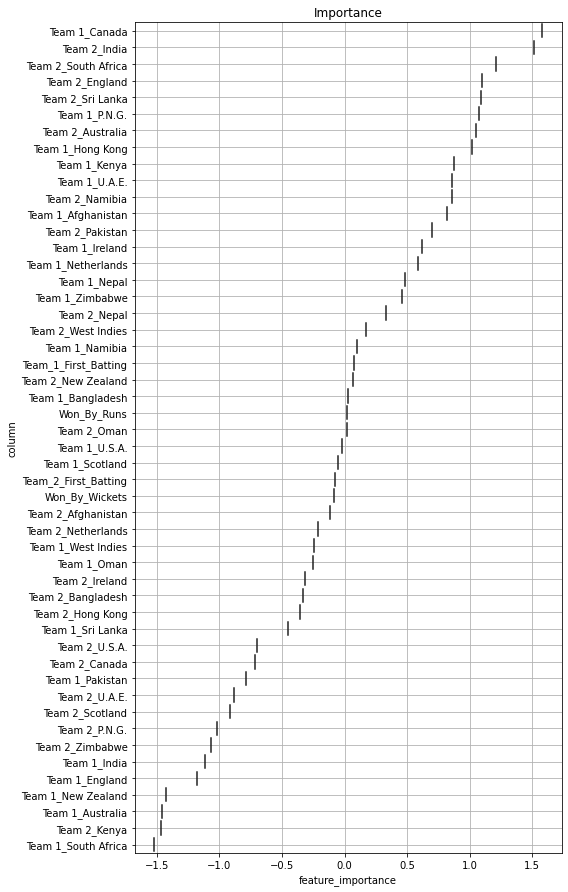

In [67]:
%%time
# Fit a LogisticRegression model to the train dataset

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate the model
lr=LogisticRegression()


# Fit the model to the data
lr.fit(X_train,y_train)
# print score on train and valid set
print("train accuracy:",lr.score(X_train,y_train))
print("test accuracy:" ,lr.score(X_valid,y_valid))

# print classification report of the model using function created before

print_score(lr)
# visualizing importance of features
fig,ax=visualize_importance(lr.coef_[0],X)


### RandomForestClassifier

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

train accuracy 1.0
test accuracy 0.9881889763779528
Classification report 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       151
           2       1.00      0.97      0.99       103

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254

Wall time: 2.42 s


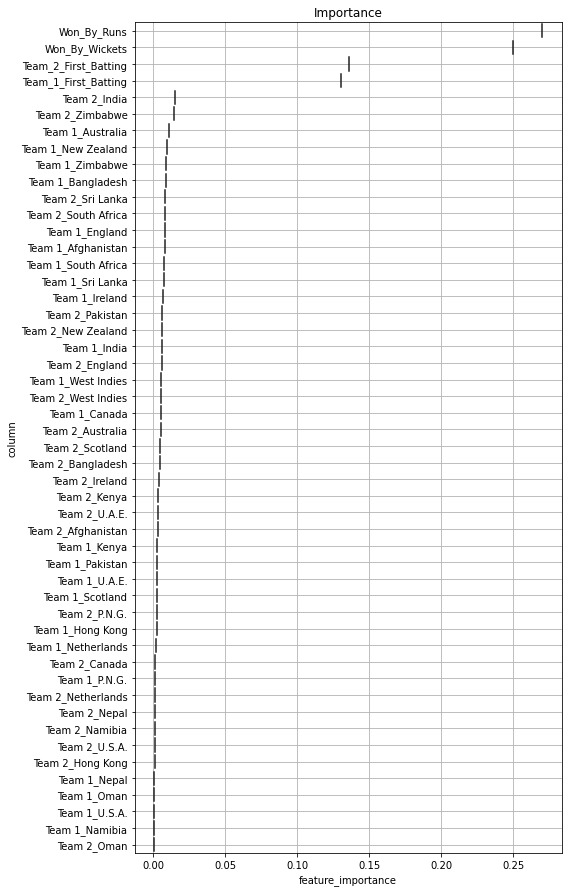

In [68]:
%%time
# Fit a Random Forest Classifier model to the train dataset

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
clf = RandomForestClassifier()
# Fit the model to the data
clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",clf.score(X_train,y_train))
print("test accuracy",clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(clf)
# visualizing the inportance of features.
fig,ax=visualize_importance(clf.feature_importances_,X)

### XGBClassifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
It implements machine learning algorithms under the Gradient Boosting framework.

[17:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy 1.0
test accuracy 1.0
Classification report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       103

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254

Wall time: 1.9 s


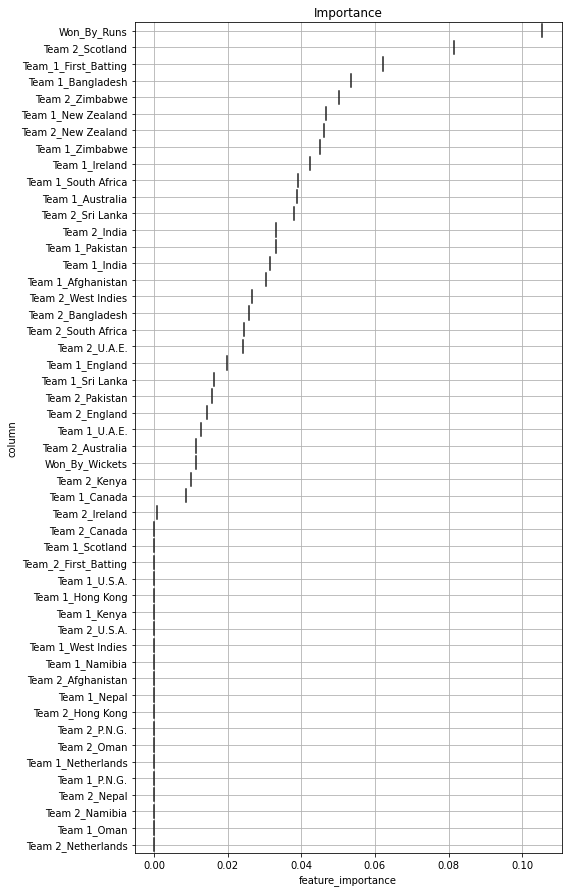

In [69]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
from xgboost import XGBClassifier
x_clf=XGBClassifier()
x_clf.fit(X_train,y_train)
# print score on train and valid set 
print("train accuracy",x_clf.score(X_train,y_train))
print("test accuracy",x_clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(x_clf)
# visualizing the inportance of features.
fig,ax=visualize_importance(x_clf.feature_importances_,X)


### Support Vector Classifier

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.


In [70]:
%%time
# Fit a SVC model to the train dataset

# Import SVC
from sklearn.svm import SVC

# Instantiate the model
clf = SVC()

# Fit the model to the data
clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",clf.score(X_train,y_train))
print("test accuracy",clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(clf)


train accuracy 0.9763546798029556
test accuracy 0.9448818897637795
Classification report 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95       151
           2       0.97      0.89      0.93       103

    accuracy                           0.94       254
   macro avg       0.95      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254

Wall time: 227 ms


### GaussianNB

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. 
It's specifically used when the features have continuous values. 
It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [71]:
%%time
# Fit a GaussianNB model to the train dataset

# Import GaussianNB
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
clf = GaussianNB()

# Fit the model to the data
clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",clf.score(X_train,y_train))
print("test accuracy",clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(clf)

train accuracy 0.6285714285714286
test accuracy 0.6377952755905512
Classification report 
               precision    recall  f1-score   support

           1       0.63      0.93      0.75       151
           2       0.67      0.21      0.32       103

    accuracy                           0.64       254
   macro avg       0.65      0.57      0.54       254
weighted avg       0.65      0.64      0.58       254

Wall time: 127 ms


### K Neighbors Classifier

K-Nearest Neighbor is a simple supervised classification algorithm.
It can be used for regression as well as classification.
It is non-parametric as it does not make assumption on the data distribution.

In [72]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
neigh = KNeighborsClassifier(leaf_size=29,p=1,n_neighbors=24)

# fitting the model on train data
neigh.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",neigh.score(X_train,y_train))
print("test accuracy",neigh.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(neigh)

train accuracy 0.9684729064039409
test accuracy 0.9291338582677166
Classification report 
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       151
           2       0.97      0.85      0.91       103

    accuracy                           0.93       254
   macro avg       0.94      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254

Wall time: 183 ms


### Decision Tree Classifier

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

In [73]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
clf = DecisionTreeClassifier()

# fitting the model on train data
clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",clf.score(X_train,y_train))
print("test accuracy",clf.score(X_valid,y_valid))



train accuracy 1.0
test accuracy 0.9645669291338582
Wall time: 15 ms


### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [74]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
g_clf = GradientBoostingClassifier()

g_clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",g_clf.score(X_train,y_train))
print("test accuracy",g_clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(g_clf)

train accuracy 0.8719211822660099
test accuracy 0.7834645669291339
Classification report 
               precision    recall  f1-score   support

           1       0.77      0.91      0.83       151
           2       0.82      0.60      0.69       103

    accuracy                           0.78       254
   macro avg       0.79      0.75      0.76       254
weighted avg       0.79      0.78      0.78       254

Wall time: 285 ms


### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [75]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate the model
b_clf = BaggingClassifier()

# fitting the model on train data
b_clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",b_clf.score(X_train,y_train))
print("test accuracy",b_clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(b_clf)

train accuracy 1.0
test accuracy 0.984251968503937
Classification report 
               precision    recall  f1-score   support

           1       0.97      1.00      0.99       151
           2       1.00      0.96      0.98       103

    accuracy                           0.98       254
   macro avg       0.99      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254

Wall time: 99.8 ms


### Easy Ensemble Classifier

This algorithm is known as EasyEnsemble.
The classifier is an ensemble of AdaBoost learners trained on different balanced boostrap samples. 
The balancing is achieved by random under-sampling.

In [76]:
%%time
# Fit a EasyEnsembleClassifier model to the train dataset

# Import EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Instantiate the model
e_clf=EasyEnsembleClassifier()

# fitting the model on train data
e_clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",e_clf.score(X_train,y_train))
print("test accuracy",e_clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(e_clf)

train accuracy 0.6916256157635468
test accuracy 0.6338582677165354
Classification report 
               precision    recall  f1-score   support

           1       0.70      0.66      0.68       151
           2       0.54      0.59      0.57       103

    accuracy                           0.63       254
   macro avg       0.62      0.63      0.63       254
weighted avg       0.64      0.63      0.64       254

Wall time: 2.91 s


### AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [77]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
a_clf = AdaBoostClassifier()

# fitting the model on train data
a_clf.fit(X_train,y_train)

# print score on train and valid set 
print("train accuracy",a_clf.score(X_train,y_train))
print("test accuracy",a_clf.score(X_valid,y_valid))

# print classification report of the model using function created before
print_score(a_clf)


train accuracy 0.696551724137931
test accuracy 0.6732283464566929
Classification report 
               precision    recall  f1-score   support

           1       0.69      0.83      0.75       151
           2       0.64      0.45      0.53       103

    accuracy                           0.67       254
   macro avg       0.66      0.64      0.64       254
weighted avg       0.67      0.67      0.66       254

Wall time: 155 ms


### Now working with test dataset (year 2021 matches)

In [78]:
# test data labels 
test_y_df=pd.DataFrame(data=test_data_y)
test_y_df

,Winner_team
1269,2
1270,1
1271,1
1272,1
1273,1
1274,1
1275,1
1276,1
1277,1
1278,1


In [79]:
# Creating a dataframe for with data Team 1 , Team 2 and Winner with data of all year 2021 matches
match_result=pd.DataFrame()
match_result['Team 1']= new_data['Team 1'][1269:]
match_result['Team 2']= new_data['Team 2'][1269:]
match_result['Winner']= new_data['Winner'][1269:]
match_result

,Team 1,Team 2,Winner
1269,U.A.E.,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh
1271,Afghanistan,Ireland,Afghanistan
1272,Bangladesh,West Indies,Bangladesh
1273,Afghanistan,Ireland,Afghanistan
1274,Bangladesh,West Indies,Bangladesh
1275,Afghanistan,Ireland,Afghanistan
1276,West Indies,Sri Lanka,West Indies
1277,West Indies,Sri Lanka,West Indies
1278,West Indies,Sri Lanka,West Indies


In [80]:
# Predicting on test data 
predicted_winner=neigh.predict(test_data_x)

#  Creating a dataframe with columns "Actual" and "Predicted"
res=pd.DataFrame()

# 'Actual' column data is true test y label
res['Actual']=test_y_df['Winner_team']

# 'Predicted' column is predicted labels
res['Predicted']=predicted_winner

# creat a list for storing coverted winner data from numerical label to object
pred_winner=[]

# looping through res['Predicted'],teams['Team 1'],teams['Team 2'] simultaneously using zip function in python
for pred,team1,team2 in zip(res['Predicted'],match_result['Team 1'],match_result['Team 2']):
    # Check condition if predicted label is equal to 1
    if pred==1:
        # Append winner list the object name of team 1
        pred_winner.append(team1)
    # Check condition if predicted label is equal to 2
    elif pred==2:
        # Append winner list the object name of team 2
        pred_winner.append(team2)

# Add a column 'PPred_Winner' with predicted winner data list
match_result['Pred_winner']=pred_winner


In [81]:
# match_result data
match_result

,Team 1,Team 2,Winner,Pred_winner
1269,U.A.E.,Ireland,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh,Bangladesh
1271,Afghanistan,Ireland,Afghanistan,Afghanistan
1272,Bangladesh,West Indies,Bangladesh,Bangladesh
1273,Afghanistan,Ireland,Afghanistan,Afghanistan
1274,Bangladesh,West Indies,Bangladesh,Bangladesh
1275,Afghanistan,Ireland,Afghanistan,Afghanistan
1276,West Indies,Sri Lanka,West Indies,West Indies
1277,West Indies,Sri Lanka,West Indies,West Indies
1278,West Indies,Sri Lanka,West Indies,West Indies


## Conclusion

As we used different models for predicting match winner. we have seen that Random forest outperformed all other model. Accuracy of 100% on train data set and around 98% on validation set with f1 score more than 95% that is really good.

Also other models such as SVC, KNN classifier, Decision tree classifier and Gradient Boost classifier performed really well with acuarcy more than 90% and f1 score above 90%.

We understood how important is it to do feature engineering, feature scaling before feeding the data to model also we handled multiclass classification problem by converting it two class.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.